In [1]:
import pandas as pd
import numpy as np
import hist
from gp import plt, label, limit_setting

In [2]:
# using toys so we set the RNG seed for reproducibility
rng = np.random.default_rng(seed = 1)

In [3]:
# load table of search results comparing prediction/uncertainty from the fit
# with observed number of events within the blinded region
results = pd.read_csv('../results/1-eg-2016-no-inj/search-results.csv')

In [4]:
results

,mass,sigma_m,chi2,prediction,uncertainty,observation,noise_level,length_scale,sigma_0
0,0.040,0.000982,157.625537,173840.114650,330.638602,175309.0,12562.775965,0.008990,16037.704106
1,0.045,0.001061,152.332893,427201.725590,370.893980,425419.0,12338.093975,0.008901,16045.632362
2,0.050,0.001142,147.996794,560683.131008,370.652093,561881.0,12255.989078,0.008777,16001.708831
3,0.055,0.001224,156.204076,634391.767506,378.199393,631726.0,11834.939390,0.008819,16067.138310
4,0.060,0.001308,158.774058,794726.104306,385.627070,797174.0,10023.711352,0.008616,15912.087973
5,0.065,0.001395,148.727902,778833.111449,418.184647,777590.0,11902.989762,0.008697,15948.012874
6,0.070,0.001484,147.808738,724369.041876,440.918214,725342.0,11820.151633,0.008666,15905.365994
7,0.075,0.001576,144.811822,773060.203696,487.788745,773437.0,12561.304921,0.008692,15875.649054
8,0.080,0.001670,147.499429,679569.005954,516.980501,678407.0,12160.432794,0.008685,15867.639650
9,0.085,0.001768,152.804662,579905.676386,517.223307,577048.0,12083.439399,0.008642,15881.052702


In [5]:
# generate toy experiments from our prediction, smearing it with its uncertainty
# these toy experiments stand in for possible observations if our prediction is correct
toy_experiments = rng.poisson(
    lam=rng.normal(
        loc=results.prediction,
        scale=results.uncertainty,
        size=(10000,len(results))
    )
)

# calculate the upper limit for each of the toy experiments
bkgd_pred = results.prediction.to_numpy()
toy_up_lim = limit_setting._single_bin_cls(
    bkgd_pred[np.newaxis,:],
    toy_experiments
)

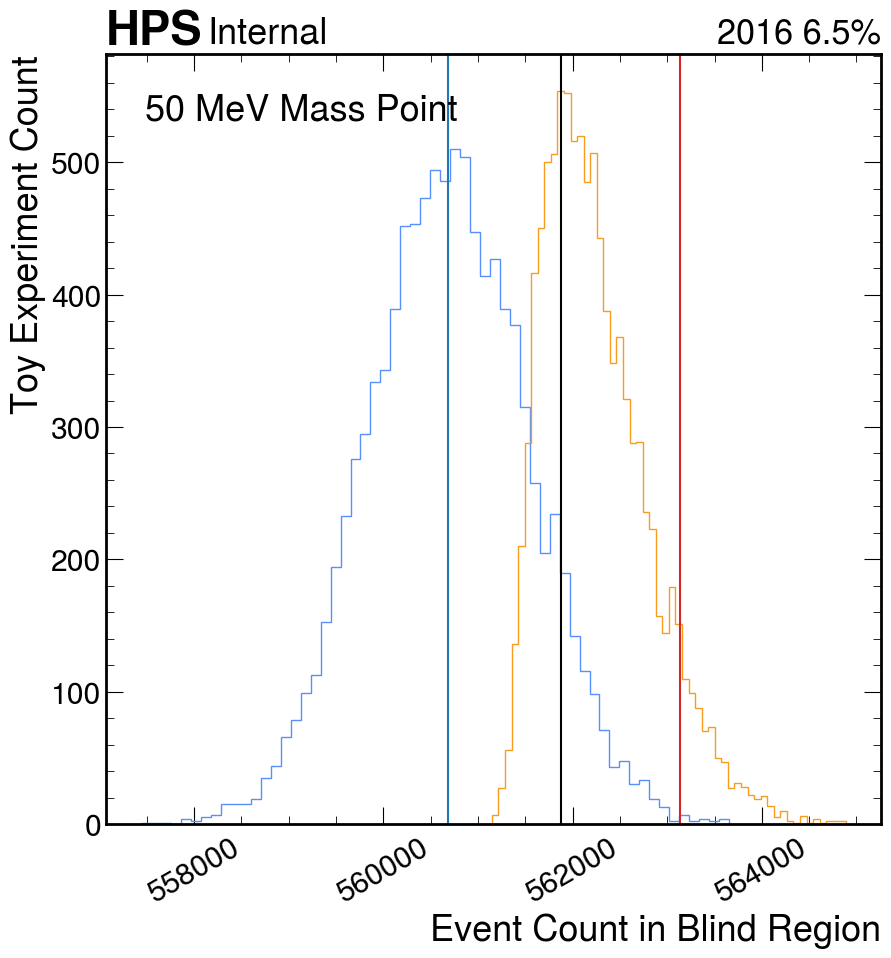

In [6]:
# example plot of a single mass point
#  blue hist - event count for toy experiments
#  orange hist - upper limit for toy experiments (above predicted event count)
#  blue line - predicted event count
#  black line - observed event count
#  red line - upper limit using observed event count
i_mass=2
plt.hist(
    toy_experiments[:,i_mass],
    bins='auto',
    histtype='step'
)
plt.hist(
    toy_up_lim[:,i_mass]+bkgd_pred[i_mass],
    bins='auto',
    histtype='step'
)
plt.axvline(results.prediction[i_mass], color='tab:blue')
plt.axvline(results.observation[i_mass], color='black')
plt.axvline(
    bkgd_pred[i_mass]+limit_setting._single_bin_cls(bkgd_pred[i_mass], results.observation[i_mass]),
    color='tab:red'
)
plt.tick_params('x',rotation=30)
label()
plt.xlabel('Event Count in Blind Region')
plt.ylabel('Toy Experiment Count')
plt.annotate(
    f'{results.mass[i_mass]*1000:.0f} MeV Mass Point',
    xy=(0.05,0.95),
    ha='left', va='top',
    xycoords='axes fraction'
)
plt.show()

/home/tom/code/hps/gaus-proc/venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


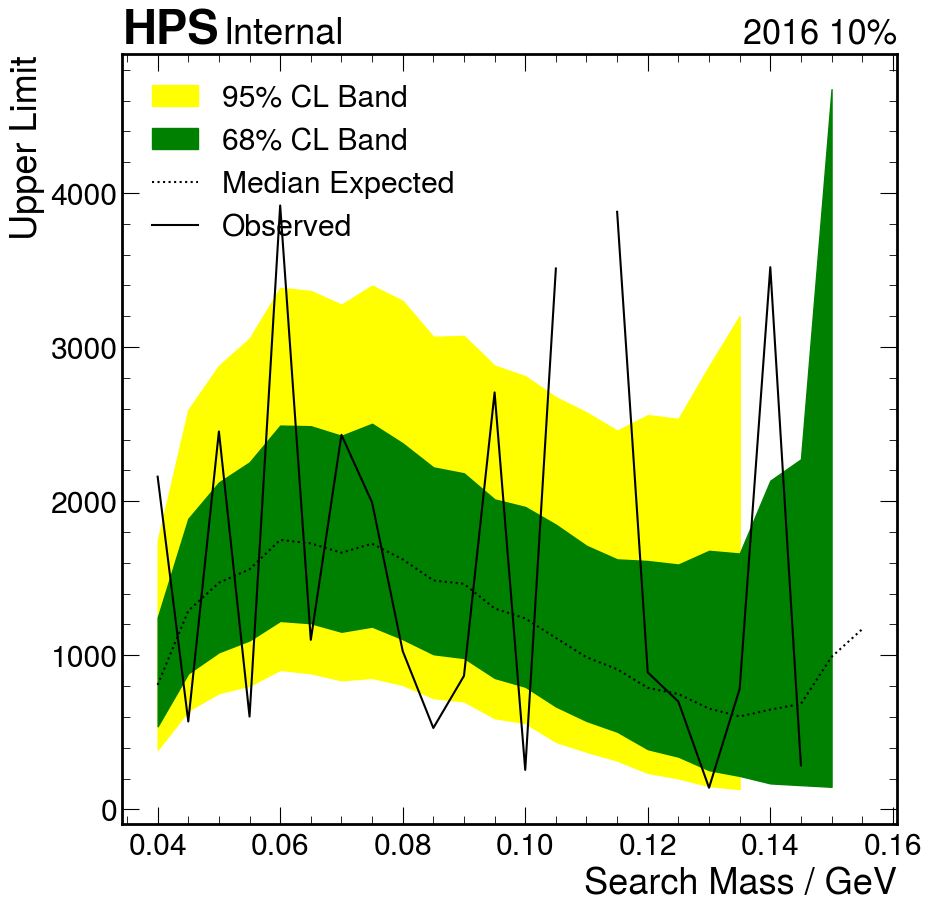

In [7]:
# summary "brazil" plot
#   calculate median and the green/yellow bands using the quantiles of the toy
#   experiments and then draw the observed limit on top

quants = np.quantile(
    toy_up_lim,
    [0.5-0.95/2,0.5-0.68/2,0.5,0.5+0.68/2,0.5+0.95/2],
    axis=0
)

plt.fill_between(
    results.mass,
    quants[0,:],
    quants[-1,:],
    color='yellow',
    label='95% CL Band'
)
plt.fill_between(
    results.mass,
    quants[1,:],
    quants[-2,:],
    color='green',
    label='68% CL Band'
)
plt.plot(
    results.mass,
    quants[2,:],
    color='black',
    ls=':',
    label='Median Expected'
)
plt.plot(
    results.mass,
    limit_setting._single_bin_cls(bkgd_pred, results.observation),
    color='black',
    label='Observed'
)
label(dataset='2016 10%')
plt.ylabel('Upper Limit')
plt.xlabel('Search Mass / GeV')
plt.legend()
plt.show()

Issues:
- NaN is returned by this upper limit calculation when the expected/observed are particularly far apart. I do not know why this is.
- The observed limit varies wildly meaning either our upper limit calculation is incorrect or our prediction is poor (could be both).